C:\Users\User\AppData\Local\Temp\ipykernel_17788\937215353.py:6: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(conv1.weight,mean=0,std=1)


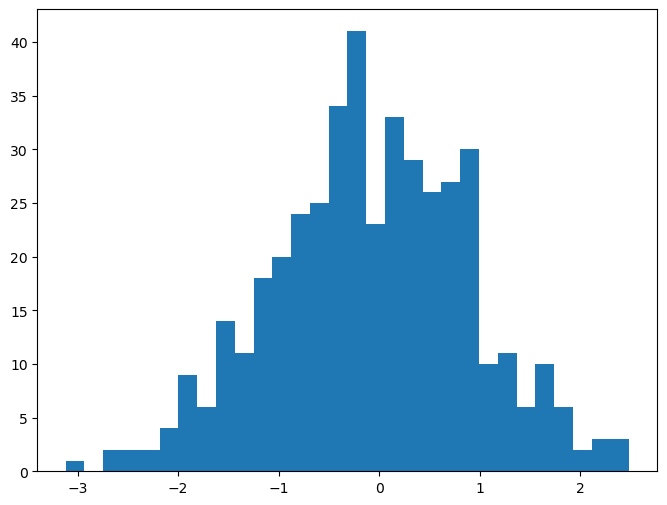

In [2]:
import torch
##针对一个权重的初始化方法
conv1=torch.nn.Conv2d(3,16,3)
##使用标准正态分布初始化权重
torch.manual_seed(12) ##随机初始化种子
torch.nn.init.normal(conv1.weight,mean=0,std=1)
##使用直方图可视化conv1.weight的分布情况
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(conv1.weight.data.numpy().reshape((-1,1)),bins=30)
plt.show()

In [3]:
##指定初始化偏置
torch.nn.init.constant(conv1.bias,val=0.1)

C:\Users\User\AppData\Local\Temp\ipykernel_17788\199269100.py:2: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  torch.nn.init.constant(conv1.bias,val=0.1)


Parameter containing:
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)

In [4]:
##建立一个测试网络
import torch.nn as nn
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        self.convl=nn.Conv2d(3,16,3)
        self.hidden=nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
        )
        self.cla=nn.Linear(50,10)
        ##定义网络定的前向传播路径
    def forward(self,x):
        x=self.convl(x)
        x=x.view(x.shape[0],-1)
        x=self.hidden(x)
        output=self.cla(x)
        return  output
##输出我们的网络结构
testnet=TestNet()
print(testnet)

TestNet(
  (convl): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)
